In [41]:
from poloniex import Poloniex
polo = Poloniex()
import os, datetime
import matplotlib.pyplot as plt
%matplotlib inline
#import plotly_express as px

#input date time and Symbol
startdate = '1/11/2010'
end_date= '31/12/2018'
Symbol = 'USDT_BTC'

#Set the time period to use. time categories: 7200, 14400, and 86400(daily).
timeperiod = 7200

#set the moving averages to use. MA = Simple Moving Average and EMA = Exponential Moving Average
MA1 = 10
MA2 = 20
EMA1 = 10
EMA2 = 20
#Create MA Variables
MA1_var = 'MA'+str(MA1)
MA2_var = 'MA'+str(MA2)
EMA1_var = 'EMA'+str(EMA1)
EMA2_var = 'EMA'+str(EMA2)


#pull HISTORICAL DATA
#86400 denotes daily
import pandas as pd
Daily_data =polo.returnChartData(Symbol, timeperiod, start= datetime.datetime.strptime(startdate, "%d/%m/%Y").timestamp(), end= datetime.datetime.strptime(end_date, "%d/%m/%Y").timestamp())
Daily_data = pd.DataFrame(Daily_data)
Daily_data['True Date']= pd.to_datetime(Daily_data['date'], unit='s')
Daily_data['Year']=  Daily_data['True Date'].dt.year

#moving average columns
Daily_data[MA1_var] = Daily_data['close'].rolling(MA1).mean()
Daily_data[MA2_var] = Daily_data['close'].rolling(MA2).mean()
Daily_data[EMA1_var] = Daily_data['close'].ewm(span = EMA1).mean()
Daily_data[EMA2_var] = Daily_data['close'].ewm(span = EMA2).mean()
#Rules
#Signal cross of 10 over 50 Buy at close price Logic 10>50 or short 10<50
#Always gong to be long or short
#Use closing prices
#Profit/Loss -- For buy (10>50) profit = close on day of cross until until 10<50 Reversal.
#Profit/Loss -- For Sell this is the reverse
#charts: Line chart, sma's and closing price
#profit LOSS calculator

Daily_data.head(2)


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20
0,225.0,1424368800,225.0,225.0,225.0,0.004444,0.999999,225.000000,2015-02-19 18:00:00,2015,NaN,NaN,225.00,225.000
1,244.0,1424376000,244.0,225.0,225.0,0.188671,45.275877,239.972316,2015-02-19 20:00:00,2015,NaN,NaN,235.45,234.975


In [42]:
#drop the Nan to get to the start of the moving averages
Daily_data_SMA= Daily_data.dropna()
Daily_data_SMA

,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20
19,240.250000,1424505600,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 08:00:00,2015,240.250000,240.662506,240.412493,240.577093
20,240.250000,1424512800,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 10:00:00,2015,240.250000,241.425006,240.382506,240.541603
21,240.250000,1424520000,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 12:00:00,2015,240.250000,241.237506,240.358119,240.510378
22,240.250000,1424527200,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 14:00:00,2015,240.250000,241.050006,240.338264,240.482823
23,240.250000,1424534400,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 16:00:00,2015,240.250000,240.862506,240.322085,240.458442
24,245.000000,1424541600,245.000000,245.000000,245.000000,0.060091,14.722239,245.000000,2015-02-21 18:00:00,2015,240.725000,240.912506,241.178288,240.929562
25,245.000000,1424548800,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 20:00:00,2015,241.200000,240.962506,241.876932,241.348253
26,245.000000,1424556000,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 22:00:00,2015,241.675000,241.200000,242.447293,241.721035
27,245.000000,1424563200,245.000000,245.000000,245.000000,0.010200,2.499000,245.000000,2015-02-22 00:00:00,2015,242.150000,241.200000,242.913112,242.053487
28,249.000000,1424570400,249.000000,249.000000,249.000000,0.010016,2.494001,249.000000,2015-02-22 02:00:00,2015,243.025000,241.637500,244.023115,242.753483


In [43]:
#create the long/short column:
def buy_sell (row):
   if row[MA1_var] > row[MA2_var] :
      return 'LONG'
   if row[MA1_var] < row[MA2_var] :
      return 'SHORT'    
longshort = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data_SMA['Go Long or Short'] = longshort
Daily_data_SMA.head(2)

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20,Go Long or Short
19,240.25,1424505600,240.25,240.25,240.25,0.0,0.0,240.25,2015-02-21 08:00:00,2015,240.25,240.662506,240.412493,240.577093,SHORT
20,240.25,1424512800,240.25,240.25,240.25,0.0,0.0,240.25,2015-02-21 10:00:00,2015,240.25,241.425006,240.382506,240.541603,SHORT


In [44]:
#Find where the column values change
#this function compares current value to previous value and if they are the same = True
#If current value does not equal then it is false.
#Therefore all the "false" tags will have an exit price for our long and a entry price for our short
Daily_data_SMA['SMA entry and exit'] = Daily_data_SMA['Go Long or Short'].eq(Daily_data_SMA['Go Long or Short'].shift())
Daily_data_SMA.to_csv('SMA.csv')

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [45]:
#Lets pull out all the entry and exit points with closing price and Short or long column
EntryandExit = Daily_data_SMA.loc[Daily_data_SMA['SMA entry and exit'] == False]
EntryandExit
#NEXT Calculate the profit/Loss per trade
#Step 1 Change all the rows named SHORT to Negative
EntryandExit.loc[EntryandExit['Go Long or Short'] == 'LONG', 'close'] = EntryandExit['close']*-1
#Calculate the profit or loss on the trades. Fist column will be nan after that the profit or 
#loss is calculated on a per trade basis

#EntryandExit['Running Total'] = EntryandExit['Profit or Loss'].cumsum()
EntryandExit['SMA Profit or Loss'] =  EntryandExit.close+EntryandExit.close.shift(1) 
#Cumulative Profit or loss
EntryandExit['SMA Cumulative Profit or Loss'] =  EntryandExit['SMA Profit or Loss'].cumsum()

EntryandExit.head(4)

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20,Go Long or Short,SMA entry and exit,SMA Profit or Loss,SMA Cumulative Profit or Loss
19,240.250000,1424505600,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 08:00:00,2015,240.250000,240.662506,240.412493,240.577093,SHORT,False,NaN,NaN
25,-245.000000,1424548800,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 20:00:00,2015,241.200000,240.962506,241.876932,241.348253,LONG,False,-4.750000,-4.750000
38,235.000000,1424642400,235.001000,235.000000,235.000005,0.080520,18.922163,235.000148,2015-02-22 22:00:00,2015,242.650100,242.837550,240.489838,241.791702,SHORT,False,-10.000000,-14.750000
57,-238.000038,1424779200,238.000038,238.000038,238.000038,0.070491,16.776813,238.000038,2015-02-24 12:00:00,2015,235.300009,235.150062,235.666685,236.283360,LONG,False,-3.000038,-17.750038


In [46]:
#trade statistics
total_trades= len(EntryandExit)
Total_profit_points = EntryandExit['SMA Profit or Loss'].sum()
largest_drawdown = EntryandExit['SMA Profit or Loss'].min()
largest_winner = EntryandExit['SMA Profit or Loss'].max()

print(f"There were {total_trades} trades made for the Simple Moving Average Strategy. The Total Profit/Loss from the \
strategy was ${round(Total_profit_points,2)}. The largest single winner was ${round(largest_winner,2)} and the largest drawdown was ${round(largest_drawdown,2)}")

There were 1000 trades made for the Simple Moving Average Strategy. The Total Profit/Loss from the strategy was $24401.17. The largest single winner was $4092.68 and the largest drawdown was $-1713.89


In [47]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','SMA Profit or Loss']]
profit_by_year.groupby(['Year']).sum()
#df1 = df[['a','b']]
#EntryandExit.groupby(['Year','SMA Cumulative Profit or Loss'])
#profit_by_year.sum()

,SMA Profit or Loss
Year,
2015,-653.224638
2016,23.519519
2017,17584.257543
2018,7446.622462


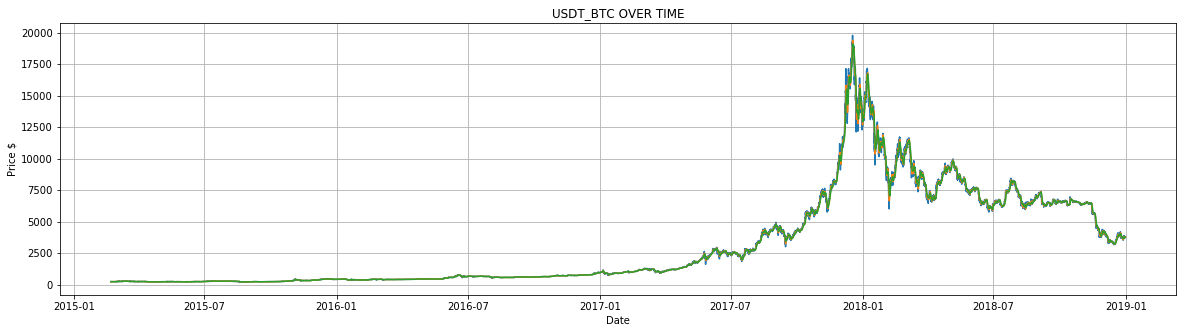

In [48]:
#Plot price and moving averages
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5)) 
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA['close'])
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA[MA1_var])
plt.plot(Daily_data_SMA['True Date'], Daily_data_SMA[MA2_var])

# Incorporate the other graph properties
plt.title(f"{Symbol} OVER TIME")
plt.ylabel("Price $")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()


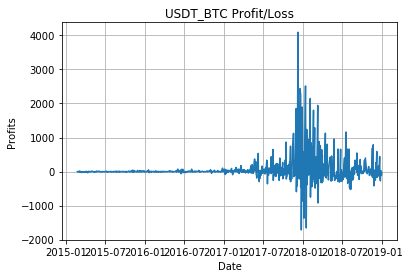

In [49]:
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['SMA Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Profit/Loss")
plt.ylabel("Profits")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

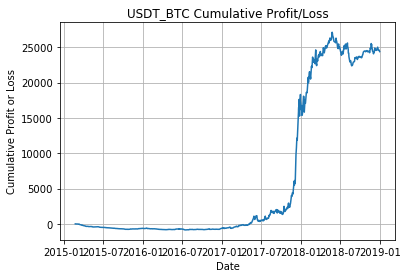

In [50]:
#Plot cummulative Profit /Loss
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['SMA Cumulative Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Cumulative Profit/Loss")
plt.ylabel("Cumulative Profit or Loss")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

Start of Second Strategy: Exponential Moving average

In [51]:
#drop the Nan to get to the start of the moving averages
Daily_data_EMA= Daily_data.dropna()

In [52]:
#create the long/short column:
def buy_sell (row):
   if row[EMA1_var] > row[EMA2_var] :
      return 'LONG'
   if row[EMA1_var] < row[EMA2_var] :
      return 'SHORT'    
longshort = Daily_data.apply (lambda row: buy_sell(row), axis=1)
Daily_data_EMA['EMA Go Long or Short'] = longshort
Daily_data_EMA

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20,EMA Go Long or Short
19,240.250000,1424505600,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 08:00:00,2015,240.250000,240.662506,240.412493,240.577093,SHORT
20,240.250000,1424512800,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 10:00:00,2015,240.250000,241.425006,240.382506,240.541603,SHORT
21,240.250000,1424520000,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 12:00:00,2015,240.250000,241.237506,240.358119,240.510378,SHORT
22,240.250000,1424527200,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 14:00:00,2015,240.250000,241.050006,240.338264,240.482823,SHORT
23,240.250000,1424534400,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 16:00:00,2015,240.250000,240.862506,240.322085,240.458442,SHORT
24,245.000000,1424541600,245.000000,245.000000,245.000000,0.060091,14.722239,245.000000,2015-02-21 18:00:00,2015,240.725000,240.912506,241.178288,240.929562,LONG
25,245.000000,1424548800,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 20:00:00,2015,241.200000,240.962506,241.876932,241.348253,LONG
26,245.000000,1424556000,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 22:00:00,2015,241.675000,241.200000,242.447293,241.721035,LONG
27,245.000000,1424563200,245.000000,245.000000,245.000000,0.010200,2.499000,245.000000,2015-02-22 00:00:00,2015,242.150000,241.200000,242.913112,242.053487,LONG
28,249.000000,1424570400,249.000000,249.000000,249.000000,0.010016,2.494001,249.000000,2015-02-22 02:00:00,2015,243.025000,241.637500,244.023115,242.753483,LONG


In [53]:
#Find where the column values change
#this function compares current value to previous value and if they are the same = True
#If current value does not equal then it is false.
#Therefore all the "false" tags will have an exit price for our long and a entry price for our short
Daily_data_EMA['EMA entry and exit'] = Daily_data_EMA['EMA Go Long or Short'].eq(Daily_data_EMA['EMA Go Long or Short'].shift())
Daily_data_EMA.to_csv('ema_output.csv')
Daily_data_EMA

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20,EMA Go Long or Short,EMA entry and exit
19,240.250000,1424505600,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 08:00:00,2015,240.250000,240.662506,240.412493,240.577093,SHORT,False
20,240.250000,1424512800,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 10:00:00,2015,240.250000,241.425006,240.382506,240.541603,SHORT,True
21,240.250000,1424520000,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 12:00:00,2015,240.250000,241.237506,240.358119,240.510378,SHORT,True
22,240.250000,1424527200,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 14:00:00,2015,240.250000,241.050006,240.338264,240.482823,SHORT,True
23,240.250000,1424534400,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 16:00:00,2015,240.250000,240.862506,240.322085,240.458442,SHORT,True
24,245.000000,1424541600,245.000000,245.000000,245.000000,0.060091,14.722239,245.000000,2015-02-21 18:00:00,2015,240.725000,240.912506,241.178288,240.929562,LONG,False
25,245.000000,1424548800,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 20:00:00,2015,241.200000,240.962506,241.876932,241.348253,LONG,True
26,245.000000,1424556000,245.000000,245.000000,245.000000,0.000000,0.000000,245.000000,2015-02-21 22:00:00,2015,241.675000,241.200000,242.447293,241.721035,LONG,True
27,245.000000,1424563200,245.000000,245.000000,245.000000,0.010200,2.499000,245.000000,2015-02-22 00:00:00,2015,242.150000,241.200000,242.913112,242.053487,LONG,True
28,249.000000,1424570400,249.000000,249.000000,249.000000,0.010016,2.494001,249.000000,2015-02-22 02:00:00,2015,243.025000,241.637500,244.023115,242.753483,LONG,True


In [54]:
#Lets pull out all the entry and exit points with closing price and Short or long column
EntryandExit = Daily_data_EMA.loc[Daily_data_EMA['EMA entry and exit'] == False]
EntryandExit
#NEXT Calculate the profit/Loss per trade
#Step 1 Change all the rows named SHORT to Negative
EntryandExit.loc[EntryandExit['EMA Go Long or Short'] == 'LONG', 'close'] = EntryandExit['close']*-1
#Calculate the profit or loss on the trades. Fist column will be nan after that the profit or 
#loss is calculated on a per trade basis

#EntryandExit['Running Total'] = EntryandExit['Profit or Loss'].cumsum()
EntryandExit['EMA Profit or Loss'] =  EntryandExit.close+EntryandExit.close.shift(1) 
#Cumulative Profit or loss
EntryandExit['EMA Cumulative Profit or Loss'] =  EntryandExit['EMA Profit or Loss'].cumsum()
EntryandExit.head(4)

C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\jthor\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]


,close,date,high,low,open,quoteVolume,volume,weightedAverage,True Date,Year,MA10,MA20,EMA10,EMA20,EMA Go Long or Short,EMA entry and exit,EMA Profit or Loss,EMA Cumulative Profit or Loss
19,240.250000,1424505600,240.250000,240.250000,240.250000,0.000000,0.000000,240.250000,2015-02-21 08:00:00,2015,240.250000,240.662506,240.412493,240.577093,SHORT,False,NaN,NaN
24,-245.000000,1424541600,245.000000,245.000000,245.000000,0.060091,14.722239,245.000000,2015-02-21 18:00:00,2015,240.725000,240.912506,241.178288,240.929562,LONG,False,-4.750000,-4.750000
36,235.500000,1424628000,235.500007,235.500000,235.500007,0.206959,48.738755,235.500000,2015-02-22 18:00:00,2015,245.050000,243.362500,243.202264,243.334714,SHORT,False,-9.500000,-14.250000
61,-238.000038,1424808000,238.000038,238.000038,238.000038,0.000000,0.000000,238.000038,2015-02-24 20:00:00,2015,236.500019,235.750020,236.954409,236.850844,LONG,False,-2.500038,-16.750038


In [55]:
#trade statistics
total_trades= len(EntryandExit)
Total_profit_points = EntryandExit['EMA Profit or Loss'].sum()
largest_drawdown = EntryandExit['EMA Profit or Loss'].min()
largest_winner = EntryandExit['EMA Profit or Loss'].max()

print(f"There were {total_trades} trades made for the Exponential Moving Average Strategy. The Total Profit/Loss from the \
strategy was ${round(Total_profit_points,2)}. The largest single winner was ${round(largest_winner,2)} and the largest drawdown was ${round(largest_drawdown,2)}")

There were 811 trades made for the Exponential Moving Average Strategy. The Total Profit/Loss from the strategy was $28515.41. The largest single winner was $3822.02 and the largest drawdown was $-1129.89


In [56]:
#Group by to get profit or loss per year
profit_by_year = EntryandExit[['Year','EMA Profit or Loss']]
profit_by_year.groupby(['Year']).sum()
#df1 = df[['a','b']]
#EntryandExit.groupby(['Year','SMA Cumulative Profit or Loss'])
#profit_by_year.sum()

,EMA Profit or Loss
Year,
2015,-1496.349679
2016,-204.055346
2017,15581.838419
2018,14633.980439


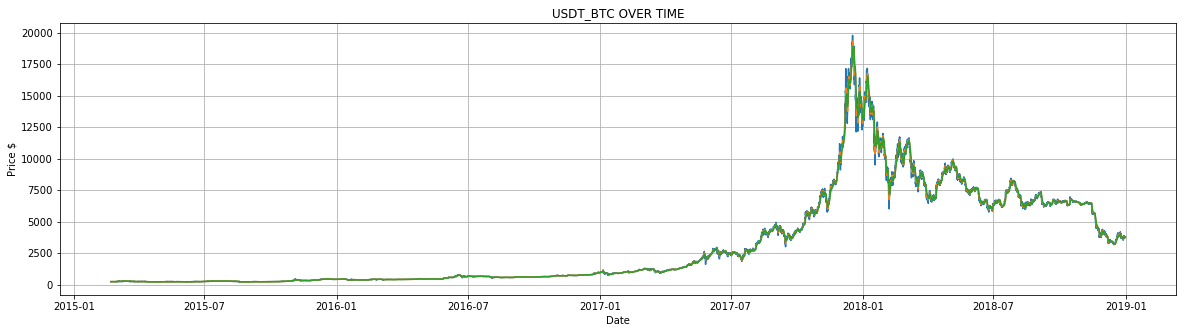

In [57]:
#Plot price and moving averages
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(20,5)) 
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA['close'])
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA[EMA1_var])
plt.plot(Daily_data_EMA['True Date'], Daily_data_EMA[EMA2_var])

# Incorporate the other graph properties
plt.title(f"{Symbol} OVER TIME")
plt.ylabel("Price $")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

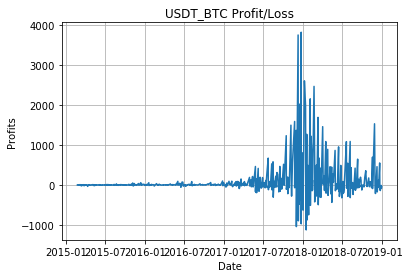

In [58]:
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['EMA Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} Profit/Loss")
plt.ylabel("Profits")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()

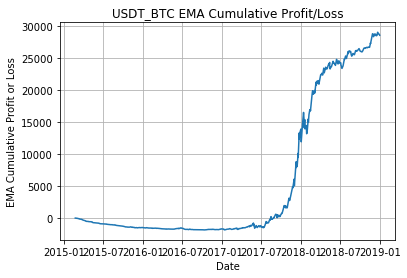

In [59]:
#Plot cummulative Profit /Loss
#Plot profit line
import matplotlib.pyplot as plt
plt.plot(EntryandExit['True Date'], EntryandExit['EMA Cumulative Profit or Loss'])

# Incorporate the other graph properties
plt.title(f"{Symbol} EMA Cumulative Profit/Loss")
plt.ylabel("EMA Cumulative Profit or Loss")
plt.xlabel("Date")
plt.grid(True)

# Save the figure
#plt.savefig("Latitude_vs_Wind.png")

# Show plot
plt.show()